In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon


In [7]:
au_mic = SkyCoord.from_name('AU Mic')


In [8]:
paranal = EarthLocation(EarthLocation.of_site('Cerro Paranal'))
print(paranal.to_geodetic())
utcoffset = -4*u.hour  # Eastern Daylight Time


GeodeticLocation(lon=<Longitude -70.40498688 deg>, lat=<Latitude -24.62743941 deg>, height=<Quantity 2669. m>)


Now for our own epochs!

In [9]:
epochs = ['2022-10-02 08:00:00',
'2022-10-27 11:00:00',
'2022-11-13 05:00:00',
'2022-12-08 08:00:00',
'2022-12-25 02:00:00',
'2023-01-19 05:00:00',
'2023-02-04 23:00:00',
'2023-03-02 02:00:00',
'2023-03-18 20:00:00']

In [64]:
def plot_epoch(epoch,savefig=None):
    midnight_time = epoch[:10] + ' 00:00:00'

    # turn these into astropy time objects
    time = Time(epoch)
    midnight = Time(midnight_time) - utcoffset

    #create a 24 hour block of times
    delta_midnight = np.linspace(-12, 12, 1000)*u.hour
    utc = (delta_midnight-utcoffset) # get this in utc 

    # create a 24 hour block of times, centred on that night's midnight
    times_date = midnight + delta_midnight
    frame_date = AltAz(obstime=times_date, location=paranal)

    # generate the positions of the moon and sun
    sunaltazs_date = get_sun(times_date).transform_to(frame_date)
    moonaltazs_date = get_moon(times_date).transform_to(frame_date)
    # generate the position of au mic
    au_mic_altazs_date = au_mic.transform_to(frame_date)
    moon_distance = moonaltazs_date.separation(au_mic_altazs_date).deg

    
    fig = plt.figure(figsize=(9.0,8.0))

    plt.plot(utc, moonaltazs_date.alt, color='k', ls=':', label='Moon')

    plt.plot(utc, au_mic_altazs_date.alt,label='AU Mic', lw=3,color='C2')

    plt.fill_between(utc.value, 0, 90,
                     sunaltazs_date.alt < -0*u.deg, color='0.9', zorder=0)
    plt.fill_between(utc.value, 0, 90,
                     sunaltazs_date.alt < -18*u.deg, color='0.1', zorder=0,alpha=0.5)

    obs = time.datetime.hour + time.datetime.minute/60.
    obs_start, obs_stop = obs-2, obs+2
#     print(obs_start,obs_stop)

    plt.axvline(obs_start,linestyle='--',color='C2',lw=3,label='Obs')
    plt.axvline(obs_stop,linestyle='--',color='C2',lw=3)
    plt.axvspan(obs_start,obs_stop,color='C2',alpha=0.25)

    # plt.colorbar().set_label('Azimuth [deg]')
    plt.legend()
    plt.xlim(-1, 10)
    plt.ylim(0, 90)
    plt.xlabel('UTC')
    plt.ylabel('Altitude [deg]')
    plt.title(epoch)
    
    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight')

In [65]:
epoch.replace(' ','_')

'2023-04-15_23:30:00'

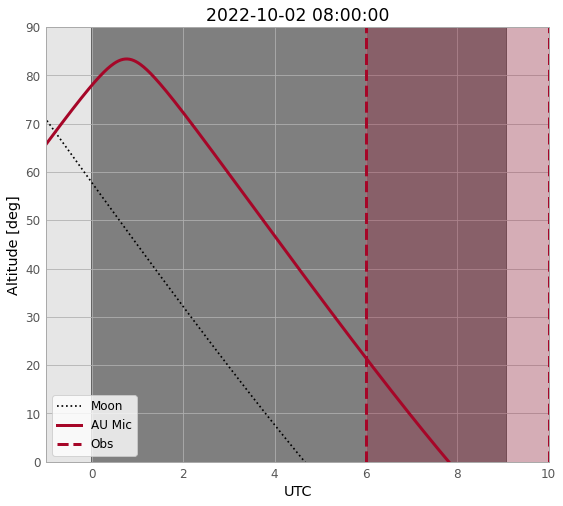

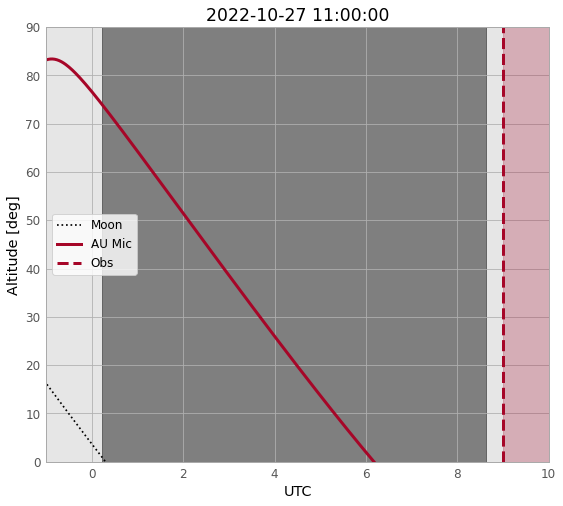

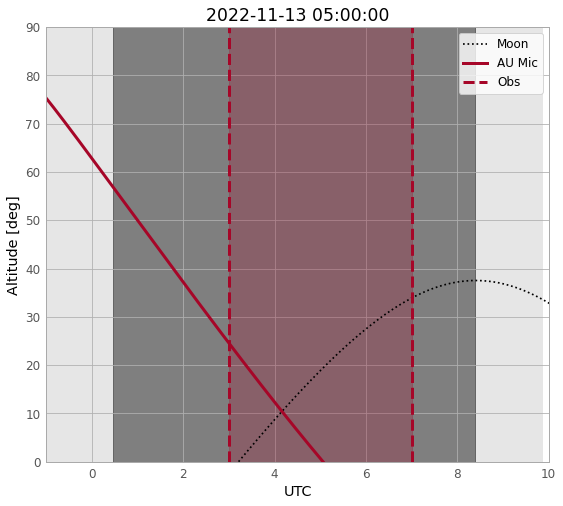

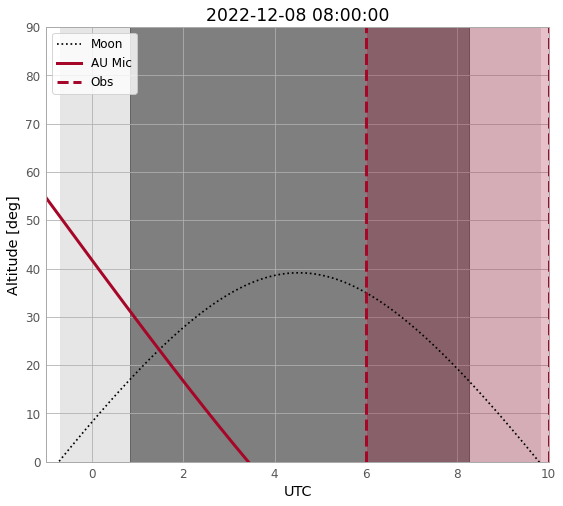

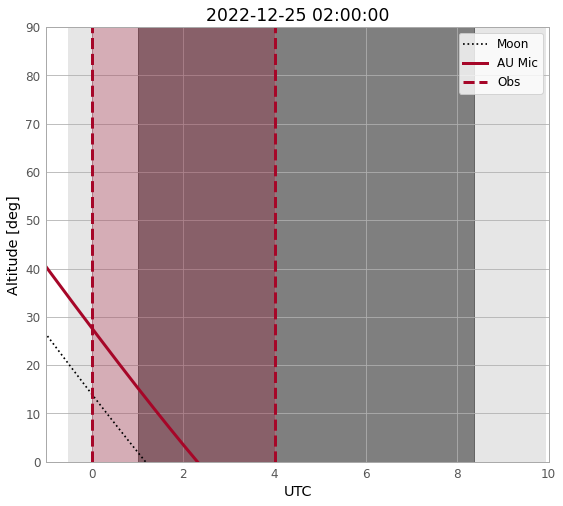

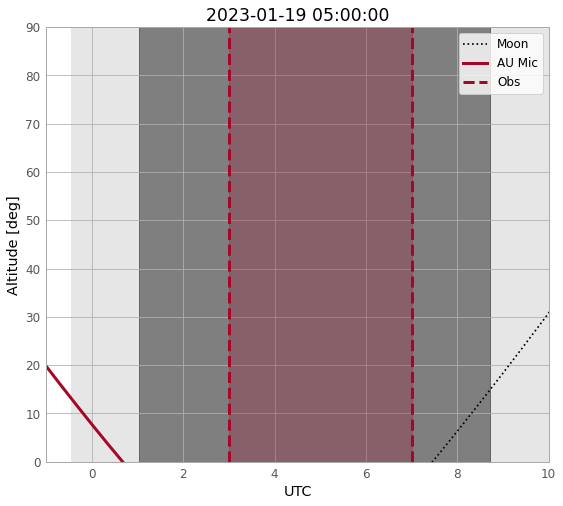

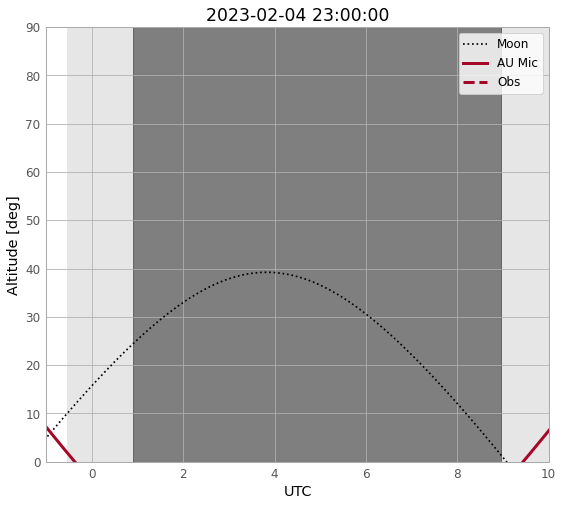

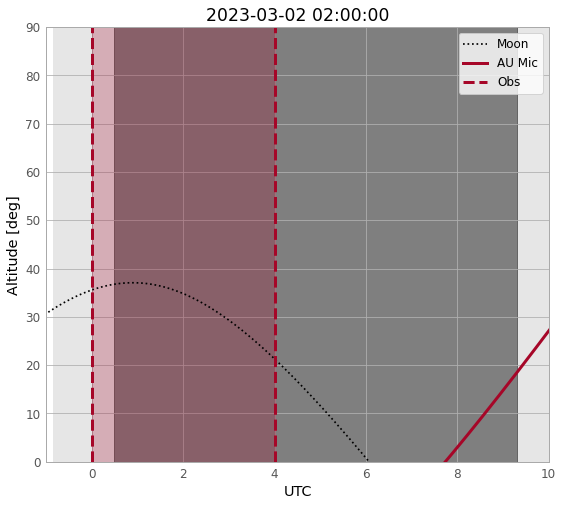

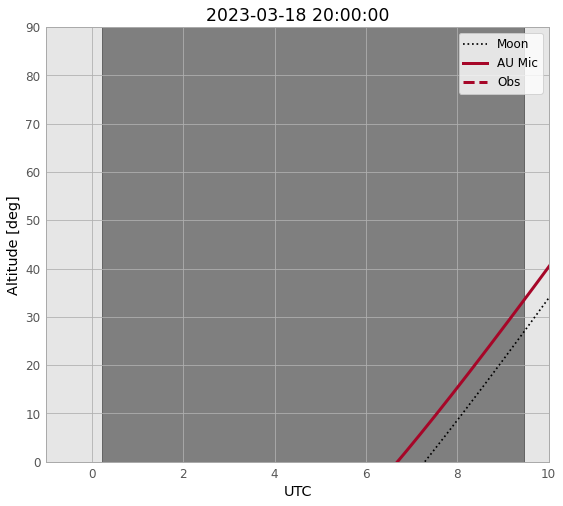

In [66]:
for epoch in epochs:
    plot_epoch(epoch,savefig='au_mic/obs_%s.png' % (epoch.replace(' ','_')))

In [67]:
secondary = ['2022-10-07 14:00:00',
'2022-10-24 12:00:00',
'2022-11-10 10:30:00',
'2022-11-27 08:30:00',
'2022-12-14 07:00:00',
'2022-12-31 05:00:00',
'2023-01-17 03:00:00',
'2023-02-03 01:30:00',
'2023-02-19 23:30:00',
'2023-03-08 22:00:00',
'2023-03-25 20:00:00',
'2023-04-11 18:30:00',
'2022-10-03 08:30:00',
'2022-10-20 06:30:00',
'2022-11-06 05:00:00',
'2022-11-23 03:00:00',
'2022-12-10 01:30:00',
'2022-12-26 23:30:00',
'2023-02-24 05:30:00',
'2023-03-13 03:30:00',
'2023-03-30 01:30:00',
'2023-04-15 23:30:00']

/var/folders/vx/lm_q_1ld7c13_fbqfscs9n4w0000gq/T/ipykernel_97996/3448005092.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(9.0,8.0))


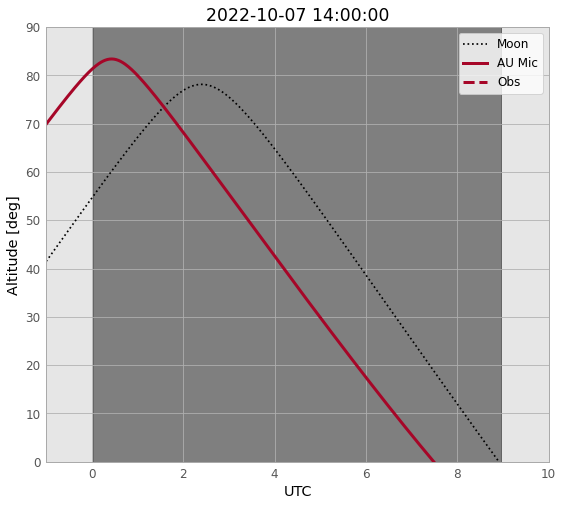

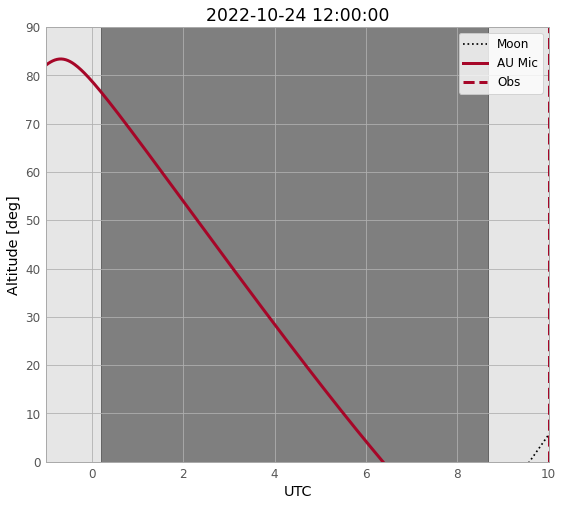

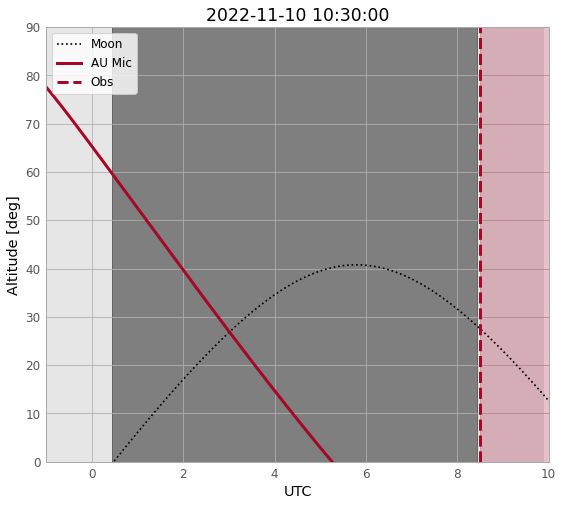

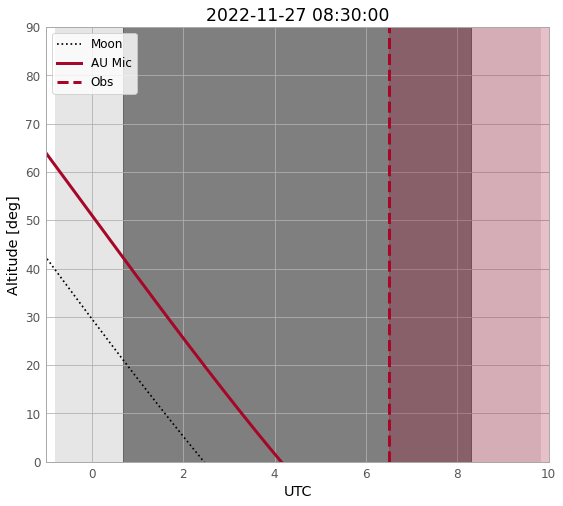

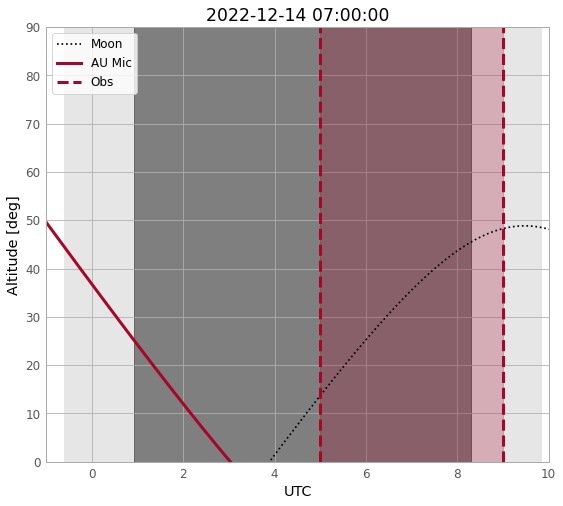

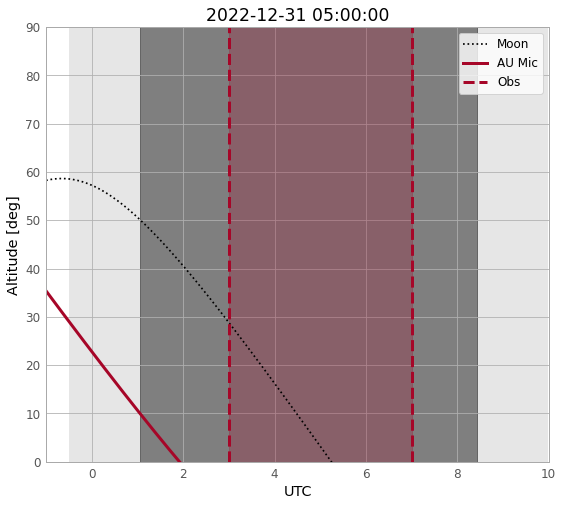

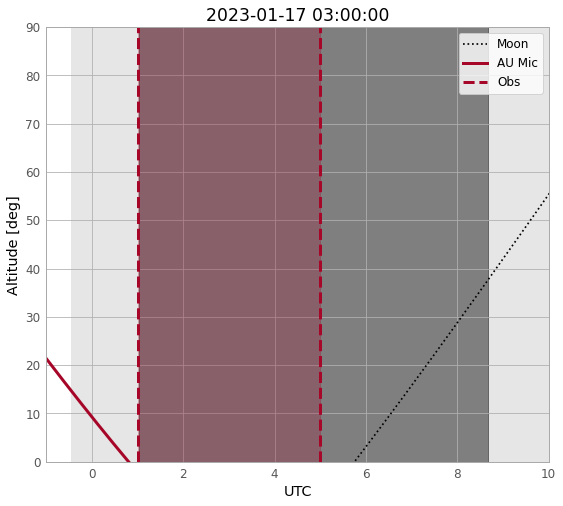

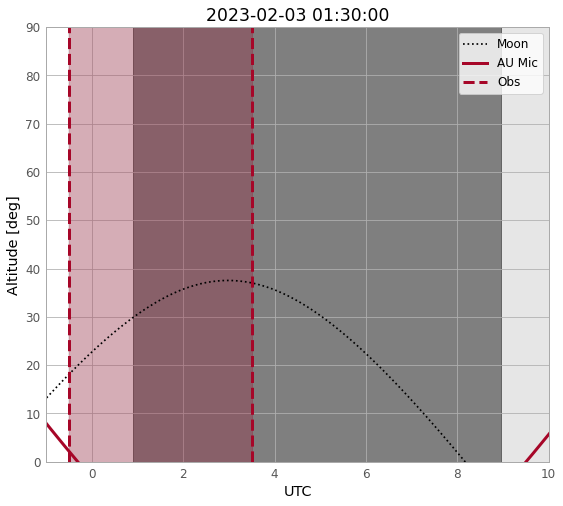

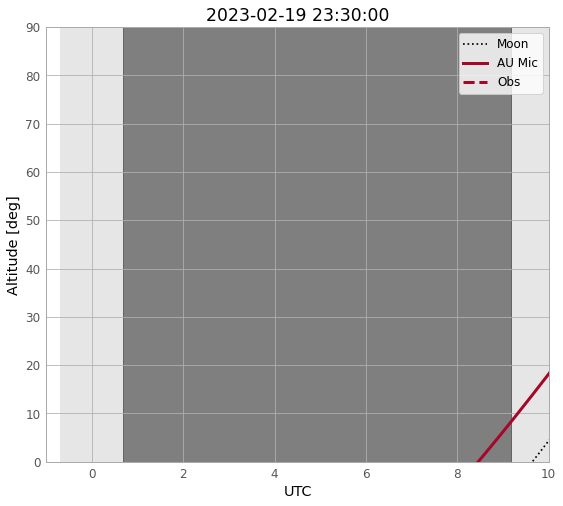

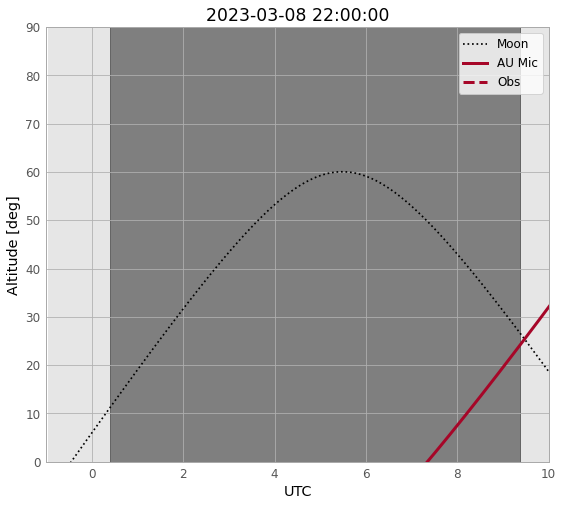

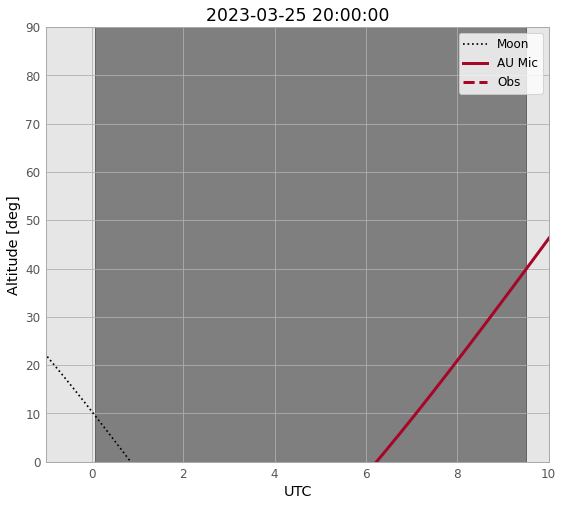

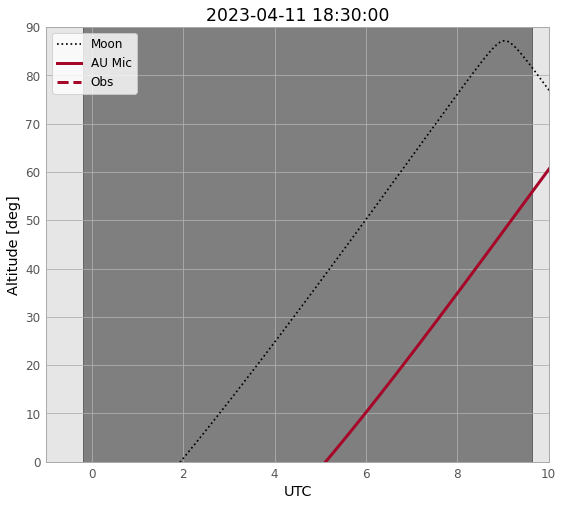

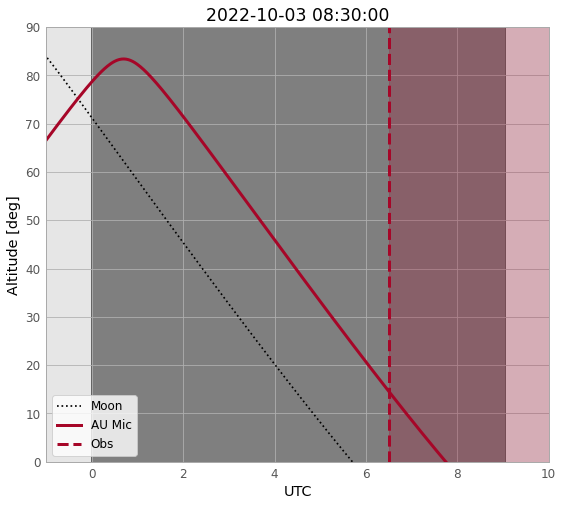

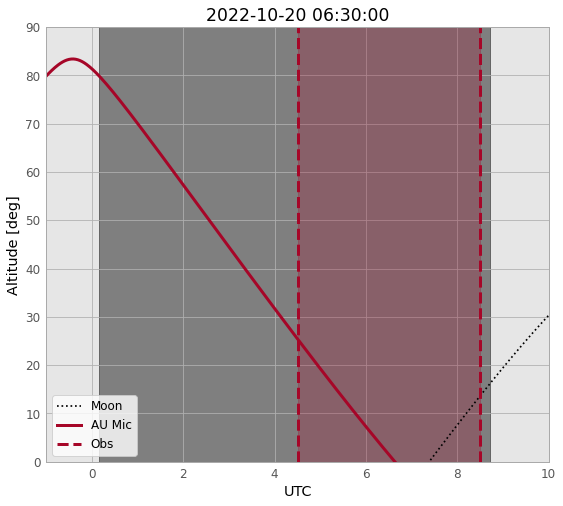

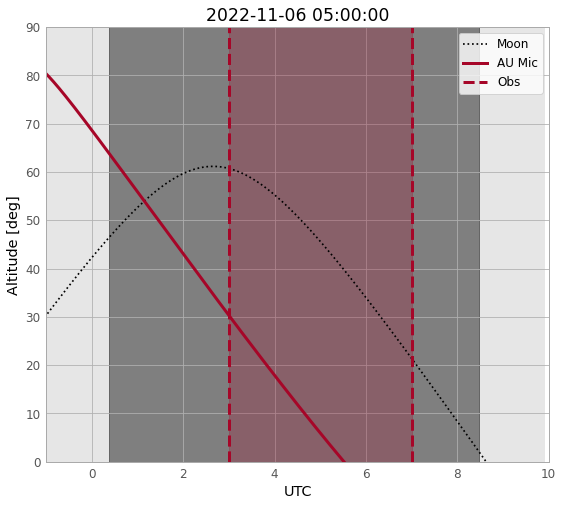

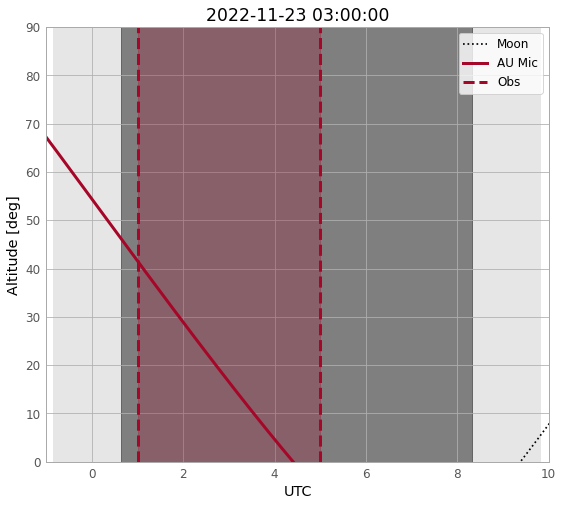

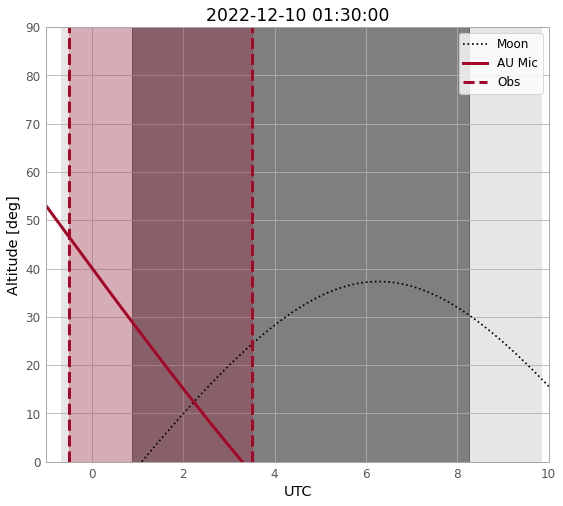

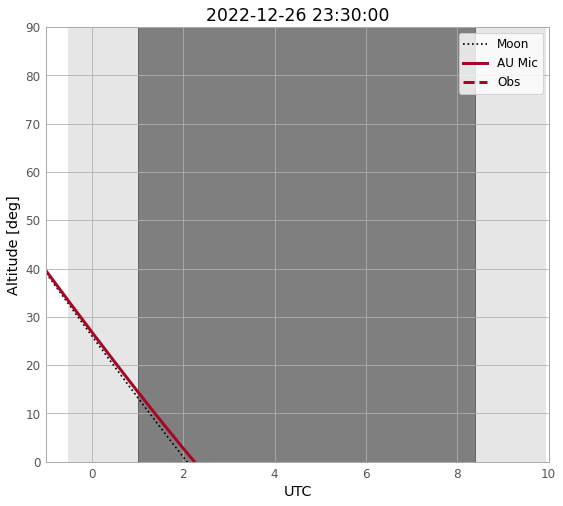

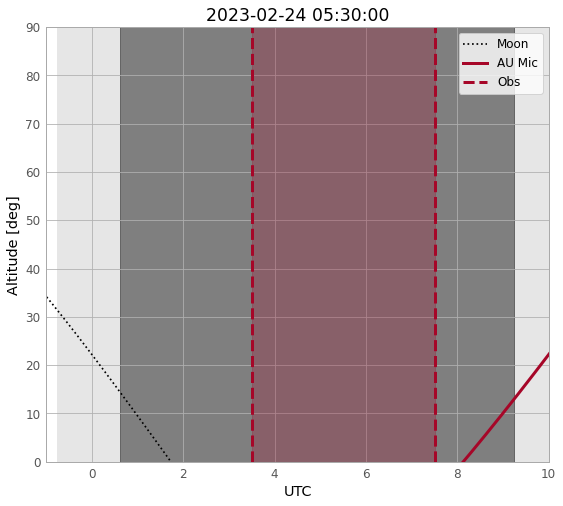

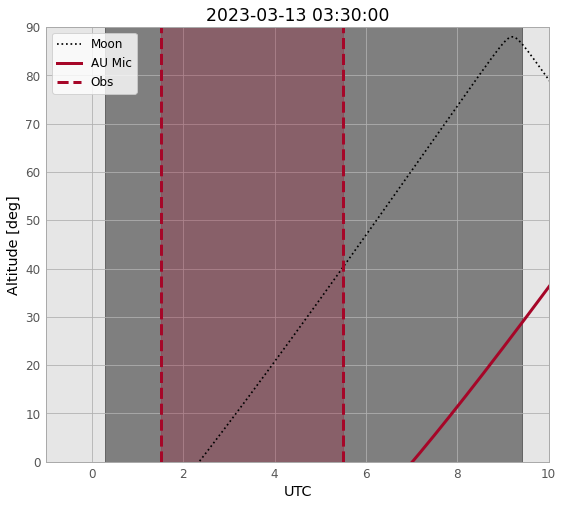

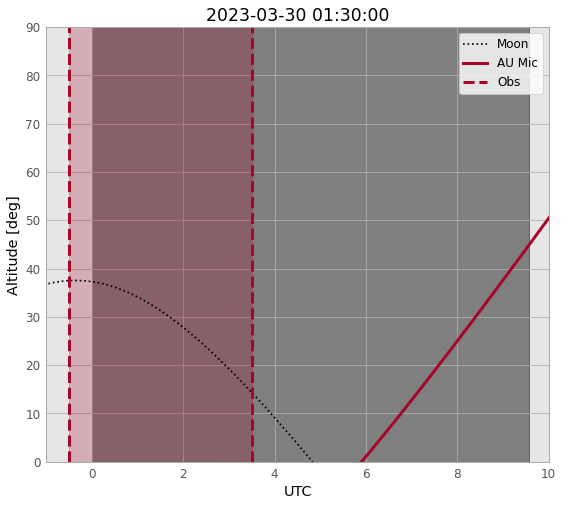

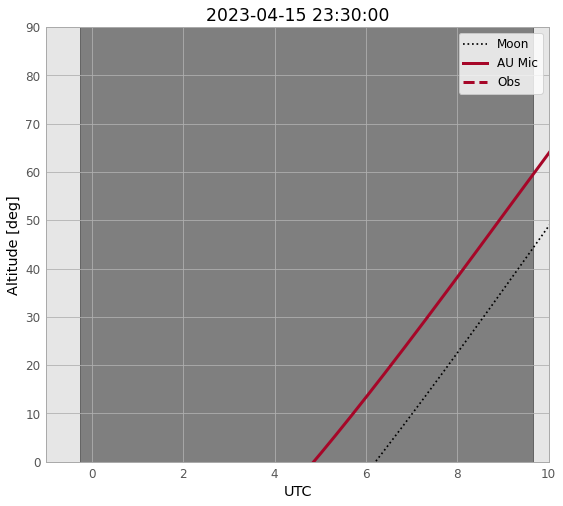

In [68]:
for epoch in secondary:
    plot_epoch(epoch,savefig='au_mic/obs_secondary_%s.png' % (epoch.replace(' ','_')))